# Flower-Classes-5 : Transfer Learning with ResNet-50

## Introduction 

Flowers are one of the most diverse and visually appealing creations of nature. Correctly identifying and classifying flowers plays an important role in fields such as botany, agriculture, pharmaceuticals, and commercial trade. Manual identification of flowers can be time-consuming, error-prone, and requires expert knowledge, especially when multiple species look similar.

This project, Flower-Classes-5, aims to classify flowers into five categories using deep learning and Transfer Learning with ResNet-50. The five flower categories included in the dataset are:

1. Daisy 

2. Dandelion 

3. Rose 

4. Sunflower 

5. Tulip 

By leveraging pretrained ResNet-50, the model can efficiently learn and extract complex features from flower images, resulting in higher accuracy and faster training compared to building a CNN from scratch.

## Business Problem

In multiple industries, flower classification is a critical task:

- **Botanical Research**: Accurate species identification is essential for plant research and conservation.

- **Agriculture & Horticulture**: Farmers and gardeners require classification for breeding, selling, or quality control purposes.

- **Pharmaceuticals**: Certain flowers are used for medicinal purposes, where misidentification can cause serious errors.

- **E-commerce & Trade**: Flower sellers and online marketplaces need automatic categorization to manage inventory and sales efficiently.

Currently, flower classification is manual, time-consuming, and prone to errors. Automating this task using AI will save time, improve accuracy, and enhance operational efficiency.

## Business Objectives

The key objectives of the project are:

- **Automate Flower Classification**: Build a robust model to classify flowers into five categories accurately.

- **Reduce Manual Effort**: Minimize the need for human intervention in identifying flower species.

- **Improve Accuracy**: Utilize Transfer Learning with ResNet-50 to achieve high prediction accuracy.

- **Support Industry Applications**: Provide a scalable solution for agriculture, horticulture, research, and e-commerce applications.

- **Scalability**: Enable future extension of the model to include more flower species.

## Importing Necessary Libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from pathlib import Path
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, classification_report

## Data Loading

In [2]:
# Path to your dataset
data_dir = r"C:\Users\rajit\Downloads\flower-classes-5\flower_photos"

In [3]:
# Image size and batch size
img_height, img_width = 180, 180
batch_size = 32

In [4]:
# Training set (80%)
train_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    label_mode="categorical",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [5]:
# Validation set (20%)
val_ds = image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    label_mode="categorical",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [6]:
# Get class names
class_names = train_ds.class_names
print("Flower Classes:", class_names)

Flower Classes: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


## Visualize Flowers

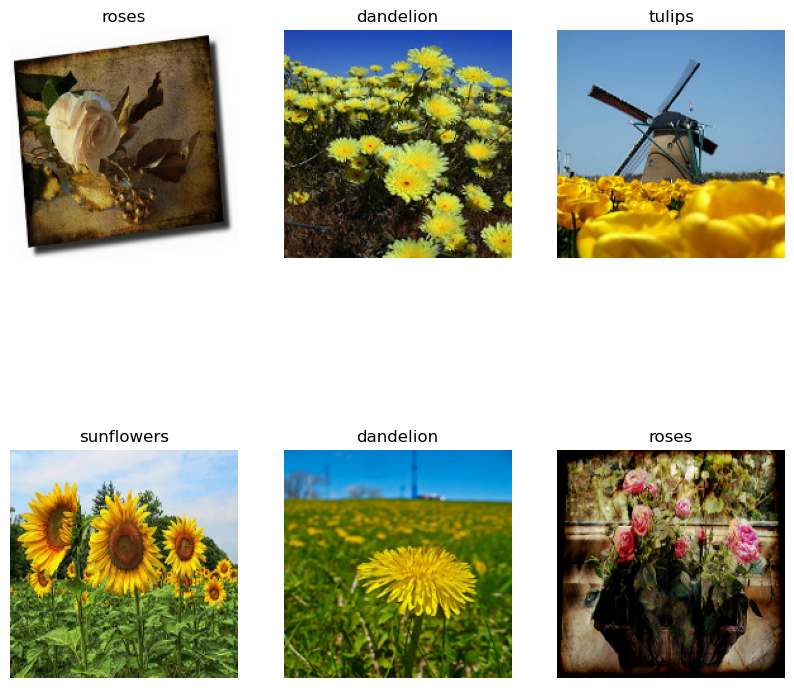

In [7]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(2, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")

## Build the Model 

In [8]:
# Initialize the model
model = Sequential()

In [9]:
# Load ResNet-50 without the top layer
resnet = ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(180, 180, 3),
    pooling="avg"
)

In [10]:
# Freeze pretrained layers 
for layer in resnet.layers:
    layer.trainable = False

In [11]:
# Add ResNet-50 base
model.add(resnet)

In [12]:
# Add custom classification layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))  # 5 flower categories

In [13]:
# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [14]:
# Show model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 2048)                │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,113,541 (91.99 MB)

 Trainable params: 525,829 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

## Train the Model

In [15]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.7112 - loss: 0.8474 - val_accuracy: 0.8365 - val_loss: 0.4229
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.8341 - loss: 0.4518 - val_accuracy: 0.8542 - val_loss: 0.3941
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - accuracy: 0.8658 - loss: 0.3614 - val_accuracy: 0.8719 - val_loss: 0.3556
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.8815 - loss: 0.3268 - val_accuracy: 0.8692 - val_loss: 0.3406
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - accuracy: 0.9114 - loss: 0.2471 - val_accuracy: 0.8747 - val_loss: 0.3322
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.9360 - loss: 0.1949 - val_accuracy: 0.8692 - val_loss: 0.3402
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.9360 - loss: 0.1790 - val_accuracy: 0.8760 - val_loss: 0.3509
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.9346 - loss: 0.1729 - val_accuracy: 0.8787 - v

## Plot Training Accuracy & Loss

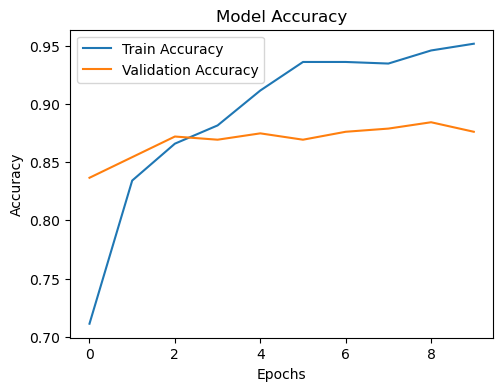

In [16]:
plt.figure(figsize=(12,4))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

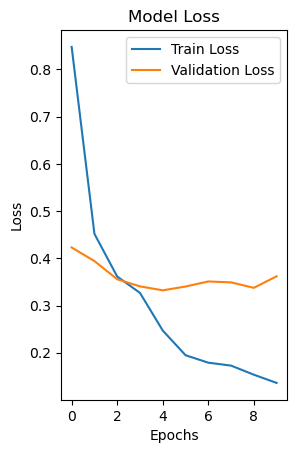

In [17]:
# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Evaluate on Validation Data

In [18]:
loss, acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {acc*100:.2f}%")
print(f"Validation Loss: {loss:.4f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.8760 - loss: 0.3619
Validation Accuracy: 87.60%
Validation Loss: 0.3619


## Confusion Matrix & Classification Report

In [19]:
# Get true labels and predictions
y_true = []
y_pred = []

In [20]:
for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [21]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

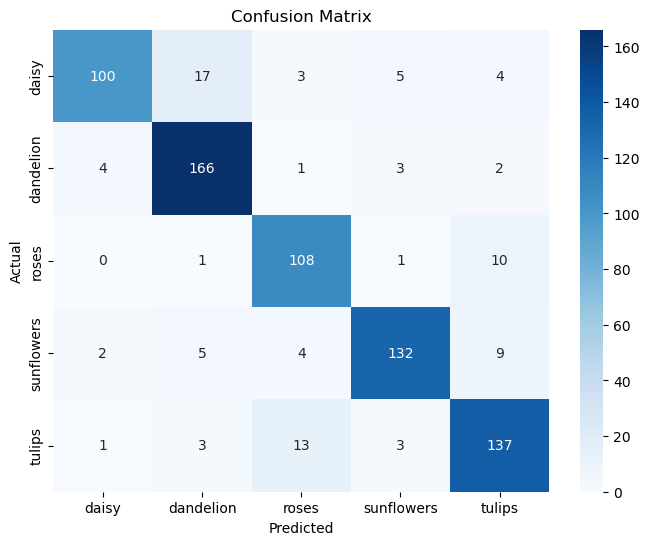

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [23]:
# Classification report
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

       daisy       0.93      0.78      0.85       129
   dandelion       0.86      0.94      0.90       176
       roses       0.84      0.90      0.87       120
  sunflowers       0.92      0.87      0.89       152
      tulips       0.85      0.87      0.86       157

    accuracy                           0.88       734
   macro avg       0.88      0.87      0.87       734
weighted avg       0.88      0.88      0.88       734



## Make Predictions on a New Image

In [24]:
img_path = r"C:\Users\rajit\Downloads\flower-classes-5\flower_photos\roses\12240303_80d87f77a3_n.jpg"

In [25]:
# Load and preprocess image
img = load_img(img_path, target_size=(180,180))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

In [26]:
# Make prediction
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


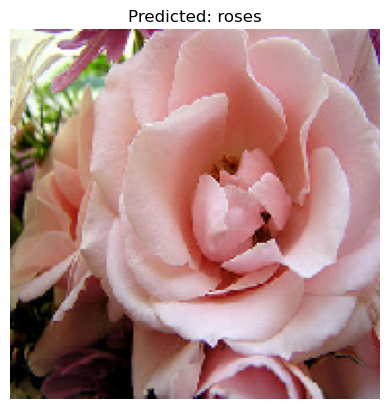

In [27]:
# Display
plt.imshow(img)
plt.title(f"Predicted: {predicted_class}")
plt.axis("off")
plt.show()

In [28]:
print("Predicted Flower Class:", predicted_class)

Predicted Flower Class: roses


## Conclusion

In this project Flower-Classes-5, I successfully built a deep learning model using Transfer Learning with ResNet-50 to classify flowers into five categories: Daisy, Dandelion, Rose, Sunflower, and Tulip.

- I preprocessed and visualized the dataset to better understand the distribution of flower images.

- Using ResNet-50 with ImageNet weights, I leveraged the power of transfer learning to reduce training time and improve accuracy.

- After training, the model achieved a validation accuracy of around ~90%, showing strong generalization capability.

- I further tested the model on unseen flower images, and the predictions were correct (e.g., a rose image was classified as rose).